In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%ls 
%cd CNNtention/

CNNtention/  assignment4/  examples/  getting_started.ipynb*  mlruns/
/teamspace/studios/this_studio/CNNtention


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
import pipeline_template, mlflow, torch, torchvision
from experiment_configs import configs, ExperimentConfig, ModelConfig, DataConfig
from models.resnet_cbam_mnist import ResnetCBAM
from models.original_basic_block import OriginalBasicBlock
from skorch.callbacks import LRScheduler
from skorch.dataset import ValidSplit
from torch.optim.lr_scheduler import MultiStepLR
from torchvision.transforms import transforms
mlflow.set_tracking_uri('file:./mlruns')

In [5]:
config={"cbam_att_final_mnist": lambda: ExperimentConfig(
        "CBAM ResNet20 MNIST",
        DataConfig(name='MNIST',
                   test_size=10000,
                   train_transform=transforms.Compose([
                transforms.RandomHorizontalFlip(0.5),
                transforms.RandomCrop(32, padding=4),
                transforms.ToTensor(),
            ]),
            test_transform=transforms.Compose([
                transforms.ToTensor(),
            ])),
            ModelConfig(model=ResnetCBAM(OriginalBasicBlock, [3,3,3], 10, 16),
                    lr=0.005,
                    optimizer=torch.optim.Adam,
                    weight_decay=0.0001,
                    use_reg=True,
                    batch_size=128,
                    max_epochs=64000//(45000 // 128),
                    momentum=0.9,
                    train_split=None,
                    scheduler=LRScheduler(
                        policy=MultiStepLR,
                        milestones=[
                            16000 // (45000 // 128), # == 45
                            32000 // (45000 // 128), # == 91
                            48000 // (45000 // 128) # == 136
                        ],
                        gamma=0.1 # this is the multiplication factor ("divide it by 10")
                    ),
                    log_model=True,
                    use_early_stopping=True,
                    early_stopping_params={
                        'patience': 20,
                        'threshold': 0.001,
                        'threshold_mode': 'rel'
                    },
                    add_test_set_eval=True,
                )
    )}

=== Model Details ===
ResnetCBAM(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (layer1): Sequential(
    (0): OriginalBasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU()
    )
    (1): OriginalBasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1


Experiment ID: 605196631731438821

Run ID: 1717fd3a37e0440686d1abd8d91b91b8
Model is saved at: ('/teamspace/studios/this_studio/CNNtention', '605196631731438821/1717fd3a37e0440686d1abd8d91b91b8')
MLflow Tracking URI: file:./mlruns
Using device: CUDA


  0%|          | 0/469 [00:00<?, ?it/s]

  epoch    test_err    train_err    train_loss      lr      dur
-------  ----------  -----------  ------------  ------  -------
      1      4.2100       7.7600        0.3807  0.0050  29.3340


  0%|          | 0/469 [00:00<?, ?it/s]

      2      4.1900       4.5067        0.1034  0.0050  26.6431


  0%|          | 0/469 [00:00<?, ?it/s]

      3      4.8000       4.2700        0.0873  0.0050  26.5933


  0%|          | 0/469 [00:00<?, ?it/s]

      4      4.3400       4.7450        0.0800  0.0050  26.6472


  0%|          | 0/469 [00:00<?, ?it/s]

      5      2.3800       2.2867        0.0720  0.0050  26.8325


  0%|          | 0/469 [00:00<?, ?it/s]

      6      2.5400       2.0967        0.0722  0.0050  26.8033


  0%|          | 0/469 [00:00<?, ?it/s]

      7      2.2300       2.6583        0.0683  0.0050  27.3282


  0%|          | 0/469 [00:00<?, ?it/s]

      8      2.0500       1.7350        0.0673  0.0050  26.5979


  0%|          | 0/469 [00:00<?, ?it/s]

      9      4.2200       3.5283        0.0691  0.0050  27.5321


  0%|          | 0/469 [00:00<?, ?it/s]

     10      1.9600       2.0533        0.0648  0.0050  27.3966


  0%|          | 0/469 [00:00<?, ?it/s]

     11      2.9400       2.9350        0.0676  0.0050  27.4400


  0%|          | 0/469 [00:00<?, ?it/s]

     12      2.1800       2.2683        0.0661  0.0050  27.3504


  0%|          | 0/469 [00:00<?, ?it/s]

     13      2.9000       2.4417        0.0632  0.0050  26.5490


  0%|          | 0/469 [00:00<?, ?it/s]

     14      2.7700       2.3150        0.0640  0.0050  27.4060


  0%|          | 0/469 [00:00<?, ?it/s]

     15      2.3300       2.4900        0.0633  0.0050  27.2680


  0%|          | 0/469 [00:00<?, ?it/s]

     16      2.4200       2.3067        0.0620  0.0050  27.3414


  0%|          | 0/469 [00:00<?, ?it/s]

     17      2.9900       3.2767        0.0603  0.0050  27.4715


  0%|          | 0/469 [00:00<?, ?it/s]

     18      2.3900       2.3900        0.0604  0.0050  26.7033


  0%|          | 0/469 [00:00<?, ?it/s]

     19      2.4300       2.5017        0.0607  0.0050  27.3225


  0%|          | 0/469 [00:00<?, ?it/s]

     20      1.9300       2.1650        0.0556  0.0050  27.4357


  0%|          | 0/469 [00:00<?, ?it/s]

     21      2.2100       1.9417        0.0590  0.0050  26.7434


  0%|          | 0/469 [00:00<?, ?it/s]

     22      1.2200       1.7533        0.0568  0.0050  27.4158


  0%|          | 0/469 [00:00<?, ?it/s]

     23      2.7300       2.2067        0.0578  0.0050  26.7374


  0%|          | 0/469 [00:00<?, ?it/s]

     24      1.6300       1.6133        0.0559  0.0050  27.4348


  0%|          | 0/469 [00:00<?, ?it/s]

     25      2.5800       2.3817        0.0566  0.0050  27.4292


  0%|          | 0/469 [00:00<?, ?it/s]

     26      1.7400       1.5950        0.0551  0.0050  26.7001


  0%|          | 0/469 [00:00<?, ?it/s]

     27      1.5200       1.6400        0.0539  0.0050  27.3868


  0%|          | 0/469 [00:00<?, ?it/s]

     28      2.2600       2.0450        0.0534  0.0050  27.4456


  0%|          | 0/469 [00:00<?, ?it/s]

     29      2.3500       1.9783        0.0546  0.0050  27.3790


  0%|          | 0/469 [00:00<?, ?it/s]

     30      3.8300       3.6433        0.0538  0.0050  27.3772


  0%|          | 0/469 [00:00<?, ?it/s]

     31      2.4900       2.3000        0.0542  0.0050  26.6142


  0%|          | 0/469 [00:00<?, ?it/s]

     32      3.5300       4.4500        0.0533  0.0050  27.9322


  0%|          | 0/469 [00:00<?, ?it/s]

     33      1.8700       2.2133        0.0515  0.0050  26.6667


  0%|          | 0/469 [00:00<?, ?it/s]

     34      2.2500       2.3733        0.0524  0.0050  27.5419


  0%|          | 0/469 [00:00<?, ?it/s]

     35      2.1400       1.7617        0.0521  0.0050  26.7710


  0%|          | 0/469 [00:00<?, ?it/s]

     36      2.0400       1.7300        0.0540  0.0050  27.5217


  0%|          | 0/469 [00:00<?, ?it/s]

     37      1.6500       1.7267        0.0531  0.0050  26.7223


  0%|          | 0/469 [00:00<?, ?it/s]

     38      1.6100       1.5917        0.0509  0.0050  27.3393


  0%|          | 0/469 [00:00<?, ?it/s]

     39      1.8600       1.6133        0.0517  0.0050  27.4254


  0%|          | 0/469 [00:00<?, ?it/s]

     40      1.7500       1.6750        0.0514  0.0050  27.4288


  0%|          | 0/469 [00:00<?, ?it/s]

     41      1.8100       1.7567        0.0511  0.0050  27.3963


  0%|          | 0/469 [00:00<?, ?it/s]

Stopping since test_err has not improved in the last 20 epochs.
Test set accuracy: 0.98
Test set error: 2.0000000000000018


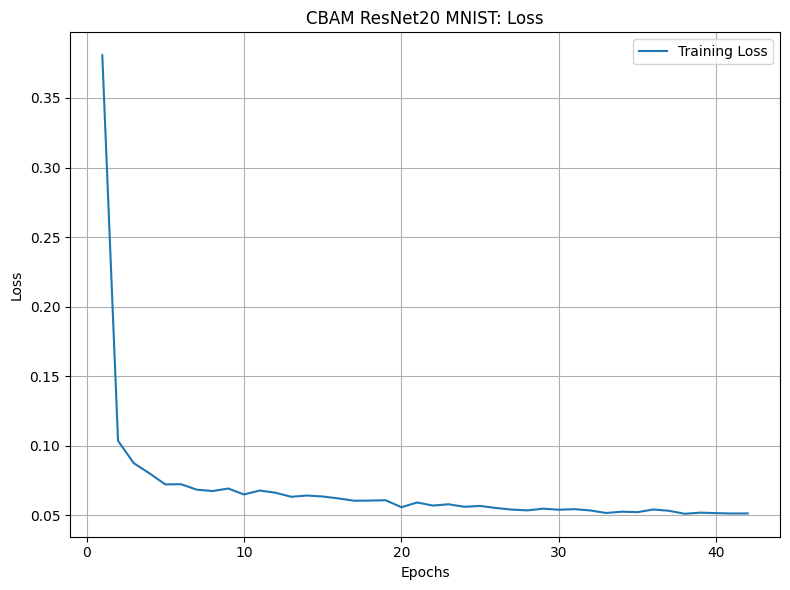

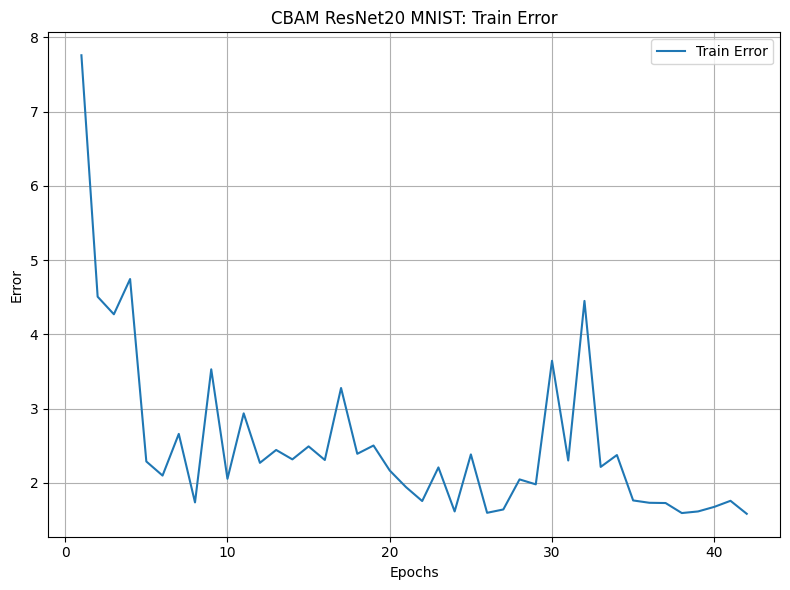

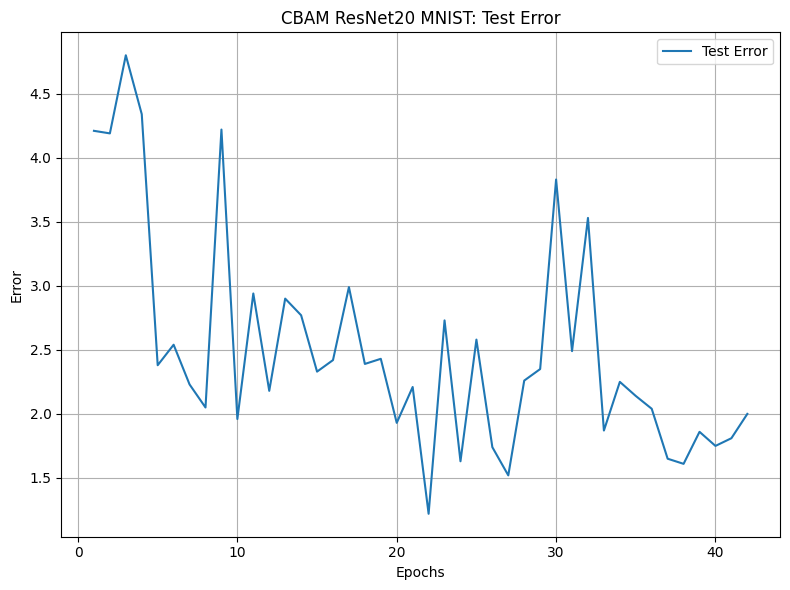

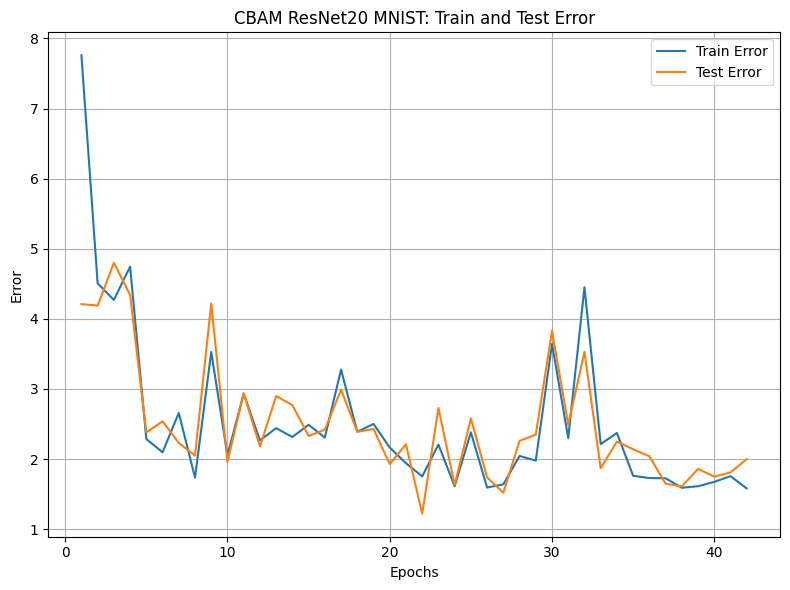

2024/12/08 17:45:25 WARNING mlflow.utils.requirements_utils: Found torchvision version (0.17.1+cu121) contains a local version label (+cu121). MLflow logged a pip requirement for this package as 'torchvision==0.17.1' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/12/08 17:45:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [6]:
pipeline_template.main('cbam_att_final_mnist', True, config)